In [1]:
import matplotlib.pylab as plt
import numpy as np
import scipy.integrate as integrate

import importlib.resources as pkg_resources

import sys

# This will reload modules that have been edited
%load_ext autoreload
%autoreload 2


In [2]:
# Uncomment when running on Colab

#!git clone https://github.com/mattbellis/earthshine
#!python3 -m pip install --upgrade build



# This was working but is not right now? 
# https://github.com/pypa/setuptools/issues/3240
#!pip install git+https://github.com/mattbellis/earthshine


In [3]:
#from importlib.resources import files


In [4]:
# Clean up any old directories
#!rm -rf earthshine
!rm -rf flux_curve.csv
!rm -rf cross_section.csv 

# Clone the repo
#!git clone https://github.com/mattbellis/earthshine

# Link to the appropriate data files
# Colab
#!ln -s earthshine/earthshine/flux_curve.csv .
#!ln -s earthshine/earthshine/cross_section.csv .
# Local
!ln -s earthshine/flux_curve.csv .
!ln -s earthshine/cross_section.csv .



# Import
sys.path.append("/content/earthshine")
import earthshine as etools 

# Packaging and data files

https://setuptools.pypa.io/en/latest/userguide/datafiles.html

https://stackoverflow.com/questions/6028000/how-to-read-a-static-file-from-inside-a-python-package

https://setuptools.pypa.io/en/latest/userguide/pyproject_config.html

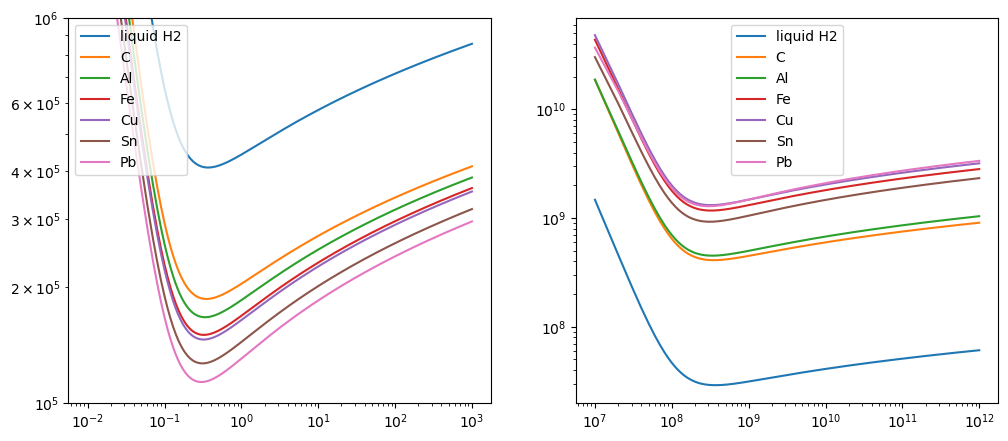

In [5]:
p = np.linspace(1e7,1e12, 100000) # Momentum, Is this in eV/c?
mass = 105e6 # Mass in eV

energy = np.sqrt(p**2 + mass**2)
ke = energy - mass

#Z = 10
#A = 18
#rho = 2000 # kg / m^2

vals = []
# Z, A, rho
vals.append([2, 2, 71, 'liquid H2'])
#vals.append([2, 4, .166, 'gas He']) 
vals.append([6, 12 , 2200, 'C'])
vals.append([13, 27 , 2700, 'Al'])
vals.append([26, 56 , 7800, 'Fe'])
vals.append([29, 63.5 , 9000, 'Cu'])
vals.append([50, 119 , 7300, 'Sn'])
vals.append([82, 206 , 11340, 'Pb'])


plt.figure(figsize=(12,5))

for val in vals:
  Z = val[0]
  A = val[1]
  rho = val[2]
  label = val[3]
  dedx=etools.bethe_formula(ke,mass=mass, Z=Z, A=A, rho=rho)

  #print(dedx)

  # Divide out the rho to get Fig. 27.3 in this
  # https://pdg.lbl.gov/2004/reviews/passagerpp.pdf
  plt.subplot(1,2,1)
  plt.plot(p/1e9,dedx/rho, label=label)

  plt.subplot(1,2,2)
  plt.plot(p,dedx, label=label)

plt.subplot(1,2,1)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e5,1e6)

plt.subplot(1,2,2)
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.savefig("dedX.png")

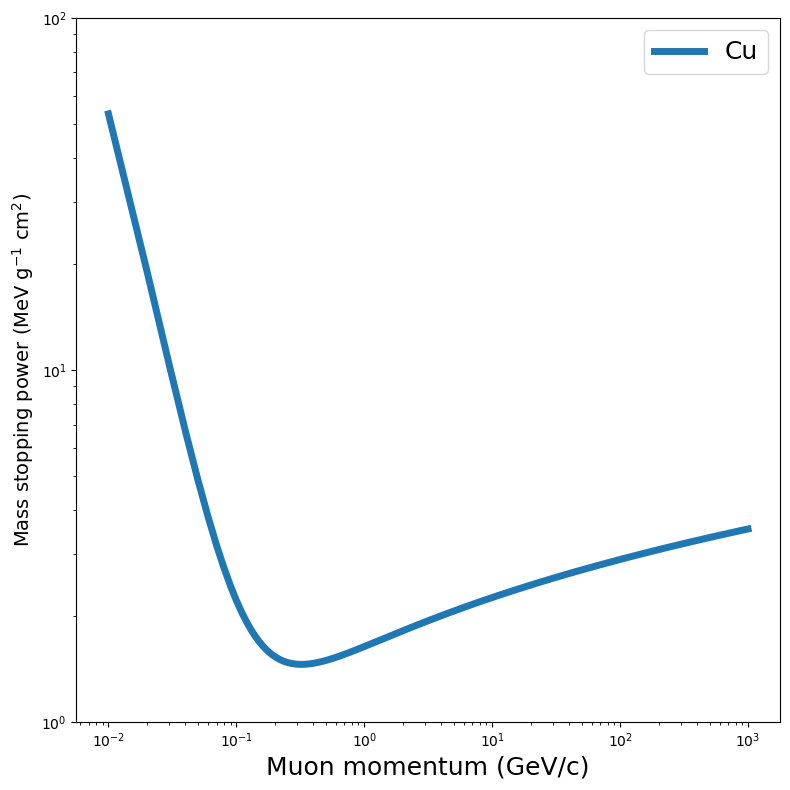

In [24]:
p = np.linspace(1e7,1e12, 100000) # Momentum, Is this in eV/c?
mass = 105e6 # Mass in eV

energy = np.sqrt(p**2 + mass**2)
ke = energy - mass

#Z = 10
#A = 18
#rho = 2000 # kg / m^2

vals = []
# Z, A, rho
#vals.append([2, 2, 71, 'liquid H2'])
#vals.append([2, 4, .166, 'gas He']) 
#vals.append([6, 12 , 2200, 'C'])
#vals.append([13, 27 , 2700, 'Al'])
#vals.append([26, 56 , 7800, 'Fe'])
vals.append([29, 63.5 , 9000, 'Cu'])
#vals.append([50, 119 , 7300, 'Sn'])
#vals.append([82, 206 , 11340, 'Pb'])


plt.figure(figsize=(8,8))

for val in vals:
  Z = val[0]
  A = val[1]
  rho = val[2]
  label = val[3]
  dedx=etools.bethe_formula(ke,mass=mass,Z=Z, A=A, rho=rho)

  #print(dedx)

  dedx /= rho # Our function multiplied by density, do divide it out to get PDG plot
  dedx /= 1e5 # To get right units

  plt.plot(p/1e9, dedx, linewidth=5, label=label)

plt.legend(fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1,100)
plt.yticks([1, 10, 100])


plt.xlabel('Muon momentum (GeV/c)', fontsize=18)
plt.ylabel(r'Mass stopping power (MeV g$^{-1}$ cm$^2$)', fontsize=14)

plt.tight_layout()

plt.savefig('mass_stopping_power_Cu.png')


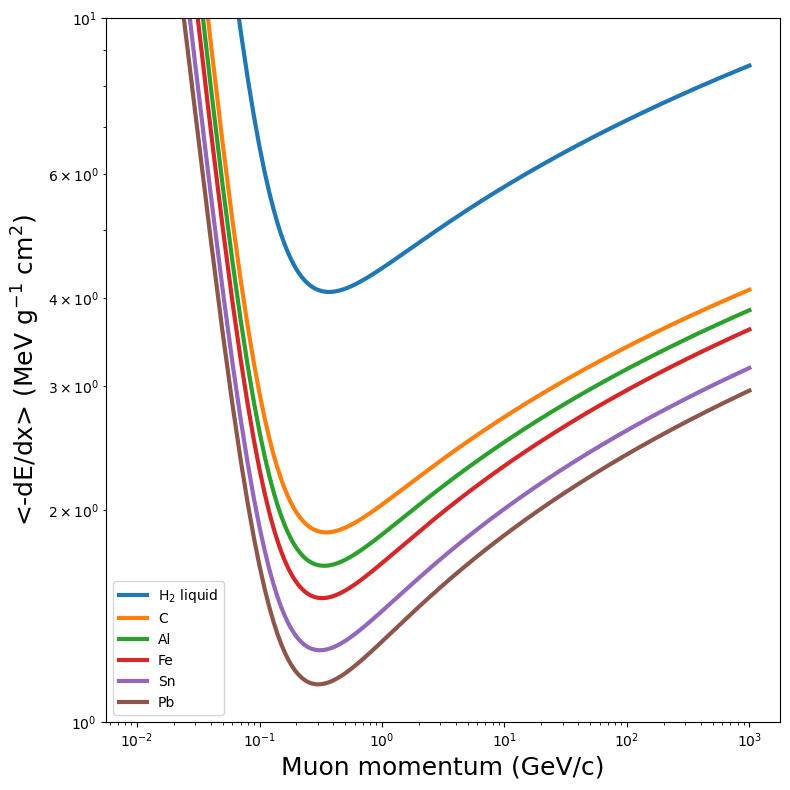

In [25]:
p = np.linspace(1e7,1e12, 100000) # Momentum, Is this in eV/c?
mass = 105e6 # Mass in eV

energy = np.sqrt(p**2 + mass**2)
ke = energy - mass

#Z = 10
#A = 18
#rho = 2000 # kg / m^2

vals = []
# Z, A, rho
vals.append([2, 2, 71, f'H$_2$ liquid'])
#vals.append([2, 4, .166, 'gas He']) 
vals.append([6, 12 , 2200, 'C'])
vals.append([13, 27 , 2700, 'Al'])
vals.append([26, 56 , 7800, 'Fe'])
#vals.append([29, 63.5 , 9000, 'Cu'])
vals.append([50, 119 , 7300, 'Sn'])
vals.append([82, 206 , 11340, 'Pb'])


plt.figure(figsize=(8,8))

for val in vals:
  Z = val[0]
  A = val[1]
  rho = val[2]
  label = val[3]
  dedx=etools.bethe_formula(ke,mass=mass, Z=Z, A=A, rho=rho)

  #print(dedx)

  y = dedx/rho # Formula has rho in it already, so we divide out to 
               # reproduce the PDG plot

  y /= 1e5  # To go from eV m^2 / kg --> MeV cm^2 / g

  # Divide out the rho to get Fig. 27.3 in this
  # https://pdg.lbl.gov/2004/reviews/passagerpp.pdf
  plt.plot(p/1e9,y, linewidth=3, label=label)


plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(1,10)

plt.xlabel('Muon momentum (GeV/c)', fontsize=18)
plt.ylabel(r'<-dE/dx> (MeV g$^{-1}$ cm$^2$)', fontsize=18)

plt.tight_layout()

plt.savefig('dEdX_multiple.png')


In [6]:
p_i = 10e9 # eV?
d = 10 # meters?

ke_f = etools.final_energy_after_distance_traveled(p=p_i, distance_traveled=d, step_size=0.01, mass=105e6, Z=30, A=60, rho=2000)

ke_i = etools.ke_from_p_and_mass(p_i,105e6)

de = ke_i - ke_f

print(f"ke initial: {ke_i/1e9:.1f} GeV")
print(f"eloss     : {de/1e9:.1f} GeV")
print(f"ke final:   {ke_f/1e9:.1f} GeV")


ke initial: 9.9 GeV
eloss     : 4.8 GeV
ke final:   5.1 GeV


In [7]:
p_i = 10e9 # eV?
d = 10 # meters?

ke_f = etools.final_energy_after_distance_traveled(p=p_i, distance_traveled=d, step_size=0.01, mass=105e6, Z=30, A=60, rho=2000)

ke_i = etools.ke_from_p_and_mass(p_i,105e6)

de = ke_i - ke_f

print(f"ke initial: {ke_i/1e9:.1f} GeV")
print(f"eloss     : {de/1e9:.1f} GeV")
print(f"ke final:   {ke_f/1e9:.1f} GeV\n")

#

p_i = 20e9 # eV?
d = 30 # meters?

ke_f = etools.final_energy_after_distance_traveled(p=p_i, distance_traveled=d, step_size=0.01, mass=105e6, Z=30, A=60, rho=2000)

ke_i = etools.ke_from_p_and_mass(p_i,105e6)

de = ke_i - ke_f

print(f"ke initial: {ke_i/1e9:.1f} GeV")
print(f"eloss     : {de/1e9:.1f} GeV")
print(f"ke final:   {ke_f/1e9:.1f} GeV\n")


ke initial: 9.9 GeV
eloss     : 4.8 GeV
ke final:   5.1 GeV

ke initial: 19.9 GeV
eloss     : 15.0 GeV
ke final:   4.8 GeV



In [8]:
# This was real sandbox stuff to test out how to read in the files
#data_text = pkg_resources.files('earthshine').joinpath('cross_section.csv').read_text()
#data_path = pkg_resources.files('earthshine').joinpath('cross_section.csv')

In [9]:
#data_text

In [10]:
#data=np.loadtxt(data_path,dtype=float,delimiter=",",unpack=True)
#print(data)

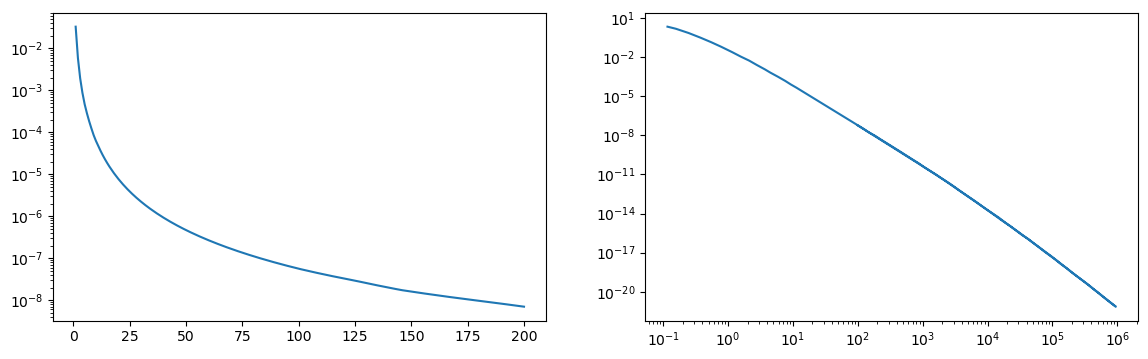

In [11]:
energy = np.linspace(1,200,200)
ypts,x,y = etools.neutrino_flux(energy)

#print(x)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(energy,ypts);
plt.yscale('log')

plt.subplot(1,2,2)
plt.plot(x,y);
plt.yscale('log')
plt.xscale('log')


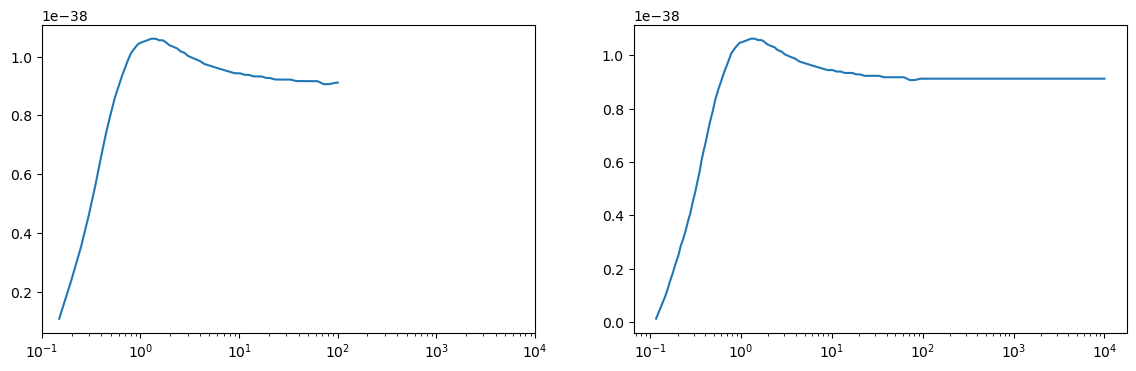

In [12]:
energy = np.linspace(0.15,100,2000)
ypts,x,y = etools.neutrino_cross_section(energy)

#print(x)

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(energy,ypts);
plt.xlim(0.1,10000)
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(x,y);
plt.xscale('log')

20 21
[20.]
40 41
[40.]
60 61
[60.]
80 81
[80.]
100 101
[100.]


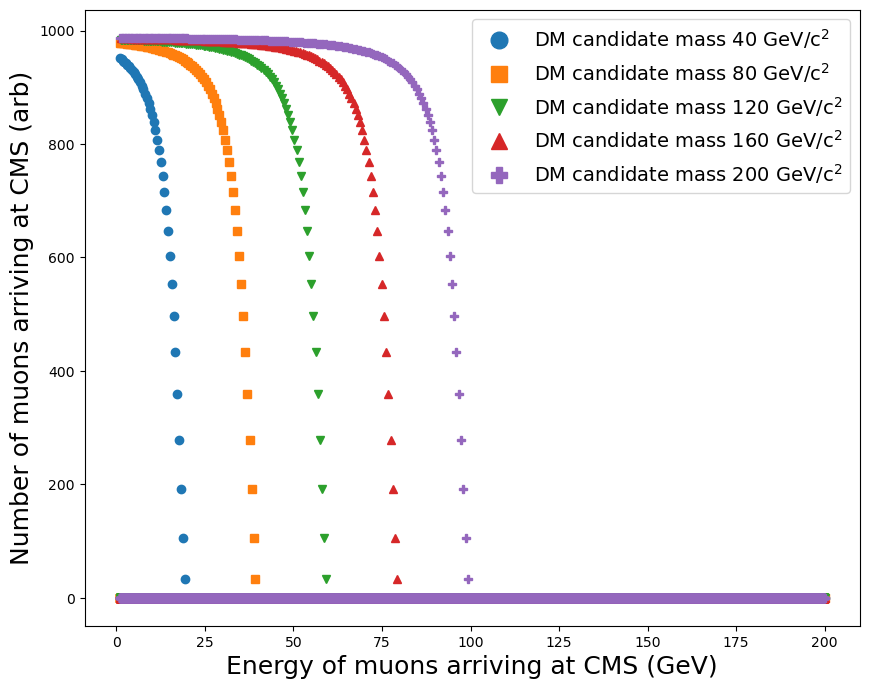

In [19]:
density = 1.6e30 # Number of nucleons per m3?
#density_m3 = density_kg * ( 6e26) # Number of nucleons per kg

length = 1 # length of "target" in meters?

CMS_length = 21 # meters
CMS_width = 15 # meters
area_of_CMS = CMS_length*CMS_width 

area_of_CMS /= 2 
# This is just because the cross section "looks" different from
# different angles, so this is just a guesstimate. 


plt.figure(figsize=(10,8))

markerstyles = ['o', 's', 'v', '^', 'P', 'D']

# Loop over different energies

for icount,elo in enumerate(range(20, 120, 20)):
#for icount,elo in enumerate(range(100, 120, 20)):

    #elo = 100
    #ehi = 101
    ehi = elo + 1
    print(elo,ehi)
    
    energy = np.linspace(elo,ehi,1)
    print(energy)
    final_energies = np.linspace(1,200,10000)

    # Let's do the calculations for many chunks of rock
    N_at_CMS = np.zeros(len(final_energies))

    # These will be at different distances from CMS

    #plt.figure()
    for distance in range(1,200,1):

        # Calculate the number of neutrinos coming out for 1 m^2 of rock of length=length
        # per steradian, at some given energy
        N = np.ones(len(energy))

        # What is the solid angle at this distance?
        Omega = etools.solid_angle(CMS_length, CMS_width/2, distance)
        N *= Omega

        # How "many" of these 1m^2 chunks are there at distance=distance
        # *below* CMS (hemisphere)
        hemisphere_area = 2*np.pi*(distance**2) # in m^2
        N *= hemisphere_area

        #print(f"distance: {distance}   Omega: {Omega}     A_hemi: {hemisphere_area}")

        # Attenuation -- energy loss!
        N_at_CMS_from_this_distance = np.zeros(len(final_energies))
        for i,e in enumerate(energy):
            p = etools.p_from_ke_and_mass(e,105e6)
            ke_final = etools.final_energy_after_distance_traveled(e*1e9, distance, step_size=.1)
            ke_final /= 1e9
            #print(ke_final)

            # Fill the array that represents the final spectra
            #idx, central = etools.find_the_number(ke_final, energy)
            idx, central = etools.find_the_number(ke_final, final_energies)

            #print(e, ke_final, idx, central)
            if idx is not None:
              # N is the number coming out of the 1m^2 rock at distance=distance
              # N_at_CMS is the number of muons measured at CMS as different energies
              N_at_CMS_from_this_distance[idx] += N[i]
            #else:
              #print(e, ke_final, idx, central)

        #print(N_at_CMS_from_this_distance)
        N_at_CMS += N_at_CMS_from_this_distance

        # For debugging
        #if distance%20==0:
        #    plt.plot(final_energies,N_at_CMS_from_this_distance,label=f'distance={distance} m')
        #if distance%10==0:
        #   plt.plot(final_energies,N_at_CMS_from_this_distance,label=f'distance={distance} m')
    #plt.xscale('log')
    #plt.xlabel("energy",fontsize=14)
    #plt.ylabel("number",fontsize=14)
    ##plt.title("energy vs number at CMS (per second)")
    ##plt.savefig("energy_vs_number_per_second")
    ###plt.yscale('log')
    #plt.legend()



    # Now do for CMS 
    #plt.figure()
    #plt.plot(energy, N)
    
    plt.plot(final_energies, N_at_CMS,markerstyles[icount],label=fr'DM candidate mass {2*elo} GeV/c$^2$')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Energy of muons arriving at CMS (GeV)',fontsize=18)
plt.ylabel('Number of muons arriving at CMS (arb)',fontsize=18)

plt.legend(fontsize=14, markerscale=2)
plt.savefig('muon_spectra_earthshine.png')


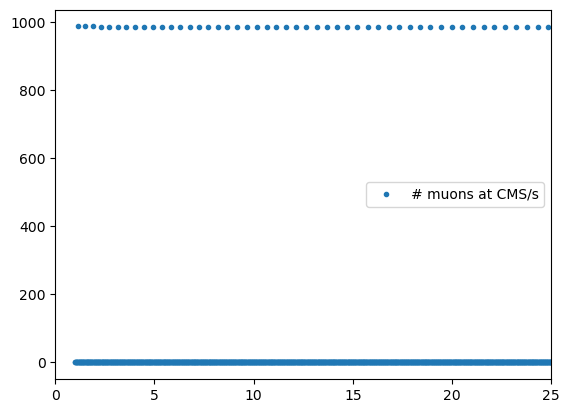

In [14]:
plt.figure()
#plt.plot(energy, N)
plt.plot(final_energies, N_at_CMS,'.',label='# muons at CMS/s')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(0,25)

plt.legend()


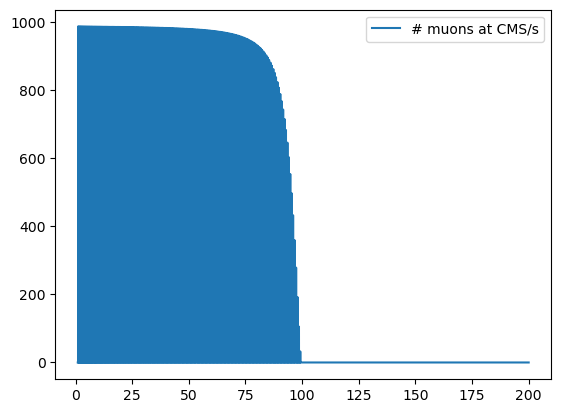

In [15]:
plt.figure()
#plt.plot(energy, N)
plt.plot(final_energies, N_at_CMS,label='# muons at CMS/s')
#plt.xscale('log')
#plt.yscale('log')

plt.legend()